<a href="https://colab.research.google.com/github/faizygithub/Deep-Learning/blob/master/MNIST_HandwrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.__version__)

1.13.1


In [0]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_ends(self, epoch, logs={}):
    if (logs.get('acc')>.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training=True
                

In [0]:
mnist=keras.datasets.mnist

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [0]:
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(y_train[0])
print(x_train[0])

In [0]:
x_train,x_test=x_train/255,x_test/255

In [0]:
callbacks=myCallback()

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train)
y_train.shape

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]


(60000,)

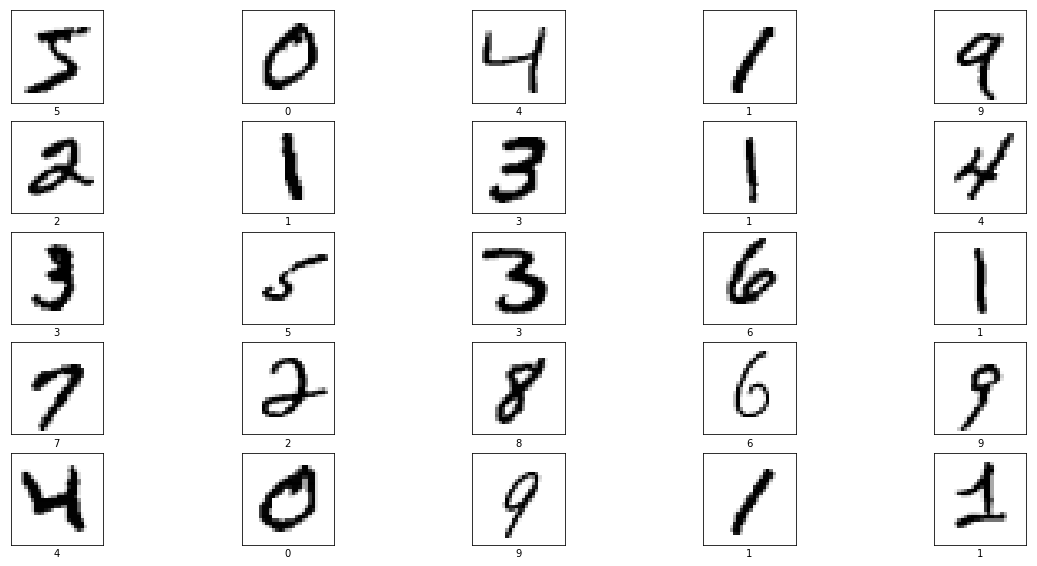

In [0]:
plt.figure(figsize=(20,20))
for  i in range(25):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()  

In [0]:
model=keras.models.Sequential([keras.layers.Flatten(),
                             keras.layers.Dense(1024,activation=tf.nn.relu),
                             keras.layers.Dense(10,activation=tf.nn.softmax)])


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 16s 265us/sample - loss: 12.7949 - acc: 0.2059
Epoch 2/10
60000/60000 [==============================] - 15s 253us/sample - loss: 12.8128 - acc: 0.2051
Epoch 3/10
60000/60000 [==============================] - 16s 262us/sample - loss: 12.8460 - acc: 0.2030
Epoch 4/10
60000/60000 [==============================] - 15s 252us/sample - loss: 12.7287 - acc: 0.2103
Epoch 5/10
60000/60000 [==============================] - 15s 254us/sample - loss: 12.7285 - acc: 0.2103
Epoch 6/10
60000/60000 [==============================] - 15s 250us/sample - loss: 12.7285 - acc: 0.2103
Epoch 7/10
60000/60000 [==============================] - 17s 278us/sample - loss: 12.7285 - acc: 0.2103
Epoch 8/10
60000/60000 [==============================] - 16s 260us/sample - loss: 12.7285 - acc: 0.2103
Epoch 9/10
60000/60000 [==============================] - 15s 257us/sample - loss: 12.7287 - acc: 0.2103
Epoch 10/10
60000/60000 [==============================

In [0]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 114us/sample - loss: 0.1040 - acc: 0.9825


[0.10401367284417647, 0.9825]

In [0]:
predictions=model.predict(x_test)
print(predictions[0])

[7.8557688e-24 1.0581679e-20 3.6224108e-23 2.3965980e-15 5.5315073e-31
 3.2991125e-22 1.2999546e-30 1.0000000e+00 4.3085327e-24 1.0389459e-18]


In [0]:
np.argmax(predictions[0])

7

In [0]:
print(y_test[0])

7


In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.1973 - acc: 0.9423
Epoch 2/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.0801 - acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0523 - acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0365 - acc: 0.9883
Epoch 5/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0262 - acc: 0.9911
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 18s 295us/sample - loss: 0.0262 - acc: 0.9911
